In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# 0 demo

In [2]:
x0 = tf.placeholder(shape=[None,3],dtype=tf.float32,name='x0')
x1 = tf.placeholder(shape=[None,3],dtype=tf.float32,name = 'x1')

In [3]:
w0 = tf.Variable(tf.truncated_normal(shape = [3,5],mean=0.0, \
                                     stddev=tf.sqrt(2.)*tf.sqrt(2.0/(3+5))),dtype=tf.float32,\
                name = 'w0')
w1 = tf.Variable(tf.truncated_normal(shape = [3,5],mean=0.0, \
                                     stddev=tf.sqrt(2.)*tf.sqrt(2.0/(3+5))),dtype=tf.float32,\
                name = 'w1')
b = tf.ones([5],name = 'b')

In [4]:
y0 = tf.matmul(x0,w0) 
y1 = tf.matmul(x0,w0) + tf.matmul(x1,w1) + b
print(y1.shape)

(?, 5)


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sample_0 = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
    sample_1 = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])
    y0_val,y1_val = sess.run([y0,y1],feed_dict={x0:sample_0,x1:sample_1})
    print(y0_val)
    print(y1_val)

[[-7.6392114e-01  9.1009533e-01  5.8799982e-04  2.9537350e-02
   1.4460812e+00]
 [-3.7820807e+00  5.1625500e+00 -1.5012958e+00  3.0836976e+00
   5.0521984e+00]
 [-6.8002405e+00  9.4150047e+00 -3.0031796e+00  6.1378579e+00
   8.6583157e+00]
 [-5.0425115e+00  6.2245388e+00 -1.6617463e+00  6.9335661e+00
   4.4703031e+00]]
[[-17.318924   14.280831   14.384875    8.271087    1.1990845]
 [ -2.7820807   6.16255    -0.5012958   4.0836973   6.0521984]
 [-17.163082   17.910744    6.282051   11.574619    8.90493  ]
 [ -9.21319     9.845281    2.5244286   9.56554     5.210529 ]]


## 0.1 rnn by api

In [6]:
x = tf.placeholder(shape=[None,None,3],dtype=tf.float32,name = 'x')

In [7]:
seq_length = tf.placeholder(shape=[None],dtype=tf.int16,name='seq_len')

In [8]:
rnncell = tf.contrib.rnn.BasicRNNCell(5,'relu',name = 'rnncell')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [9]:
tf.nn.dynamic_rnn?

In [10]:
output,last_state = tf.nn.dynamic_rnn(rnncell,x,seq_length,dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
x_batch = np.array([
# step 0 step 1
[[0, 1, 2], [9, 8, 7]], # instance 0
[[3, 4, 5], [0, 0, 0]], # instance 1 (padded with a zero vector) 
[[6, 7, 8], [6, 5, 4]], # instance 2
[[9, 0, 1], [3, 2, 1]], # instance 3
        ])
seq_length_batch = np.array([2, 1, 2, 2])

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_val,last_state_val = sess.run([output,last_state],feed_dict={x:x_batch,seq_length:seq_length_batch})
    print(output_val.shape)
    print(last_state_val.shape)
    print(output_val)
    print(last_state_val)

(4, 2, 5)
(4, 5)
[[[ 0.28963912  0.26025647  0.71481836  0.30354828  0.5901021 ]
  [ 2.7596798   3.518446    8.717754    1.1264138   7.2399836 ]]

 [[ 1.1639063   1.6560404   3.7144766   1.0035446   3.4195035 ]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 2.0381737   3.0518246   6.714135    1.7035408   6.2489047 ]
  [ 5.0750346  -0.          8.38022    -0.          0.04260743]]

 [[-0.          2.066881    5.4720354   0.51141095  4.420758  ]
  [ 2.6878343  -0.          3.6318238  -0.         -0.        ]]]
[[ 2.7596798   3.518446    8.717754    1.1264138   7.2399836 ]
 [ 1.1639063   1.6560404   3.7144766   1.0035446   3.4195035 ]
 [ 5.0750346  -0.          8.38022    -0.          0.04260743]
 [ 2.6878343  -0.          3.6318238  -0.         -0.        ]]


In [13]:
tf.reset_default_graph()

# 1 data

In [14]:
mnist = tf.keras.datasets.mnist
(x_train_src,y_train_src),(x_test_src,y_test_src) = mnist.load_data('./mnist.npz')

In [15]:
print(x_train_src.shape,y_train_src.shape)
print(x_test_src.shape,y_test_src.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [16]:
_,m,n = x_train_src.shape

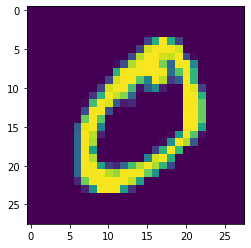

In [17]:
plt.imshow(x_train_src[1,:,:])
plt.show()

# 2 feature

In [18]:
x_train = x_train_src/255.
x_test = x_test_src/255.

In [19]:
y_train = y_train_src
y_test = y_test_src

# 3 model

In [20]:
x = tf.placeholder(shape=[None,m,n],dtype=tf.float32,name='x')
y = tf.placeholder(shape=[None],dtype=tf.int32,name='y')

In [21]:
seq_len = tf.placeholder(shape=[None],dtype=tf.int32,name='seq_len')

In [22]:
#rnncell = tf.contrib.rnn.BasicLSTMCell?

In [23]:
rnncell = tf.contrib.rnn.BasicRNNCell(100,name='rnncell')

In [24]:
tf.nn.dynamic_rnn?

In [25]:
output,last_state = tf.nn.dynamic_rnn(rnncell,x,seq_len,scope='rnn1',dtype=tf.float32)

In [26]:
print(last_state.shape)

(?, 100)


In [27]:
w = tf.Variable(tf.truncated_normal(shape=[100,10],mean=0.,stddev=tf.sqrt(2.)*tf.sqrt(2./(10+100))),\
               dtype=tf.float32,name='w')

In [28]:
b = tf.Variable(tf.ones(shape=[10]),dtype=tf.float32,name='b')

In [29]:
logit = tf.nn.xw_plus_b(last_state,w, b,name='score')

In [30]:
print(logit.shape)

(?, 10)


In [31]:
#correct = tf.nn.in_top_k?

In [32]:
correct = tf.nn.in_top_k(logit,y,1,name ='correst')

In [33]:
acc = tf.reduce_mean(tf.cast(correct,tf.float32),name='acc')

# 4 loss

In [34]:
all_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit,labels=y,name='all_loss')

In [35]:
loss = tf.reduce_mean(all_loss)

# 5 optimize

In [36]:
optimize = tf.train.AdamOptimizer(learning_rate=3e-4,name='optimize')

In [37]:
train_op = optimize.minimize(loss)

# 6 init

In [38]:
init_op = tf.global_variables_initializer()

# 7 train

In [39]:
num_epochs = 100
batch_size = 128
num_batch = int(x_train.shape[0]/128) + 1

In [40]:
saver = tf.train.Saver()

In [41]:
def feed_batch(n_epochs,batch_index,batch_size,x_train,y_train):
    beg = (batch_index -1 )* batch_size
    end = batch_index * batch_size;
    
    return x_train[beg:end],y_train[beg:end],np.array([i.shape[0] for i in x_train[beg:end]])

In [42]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(num_epochs):
        for j in range(1,num_batch):
            sample_x,sample_y,sample_len = feed_batch(i,j,batch_size,x_train,y_train)
            #print(sample_x.shape,sample_y.shape,sample_len.shape)
            if j%100 == 0:
                acc_train,loss_train,_ = sess.run([acc,loss,train_op],\
                                                  feed_dict={x:sample_x,y:sample_y,seq_len:sample_len})
                acc_test = sess.run(acc,feed_dict={x:x_test,y:y_test,\
                                                   seq_len:np.array([i.shape[0] for i in x_test])})
                #print('%d\t%d\t%f\t%f\t%f'%(i,j,loss_train,acc_train,acc_test))
            else:
                _ = sess.run([train_op],feed_dict={x:sample_x,y:sample_y,seq_len:sample_len})
        acc_test,loss_test = sess.run([acc,loss],feed_dict={x:x_test,y:y_test,\
                                                        seq_len:np.array([i.shape[0] for i in x_test])})
        acc_train,loss_train = sess.run([acc,loss],feed_dict={x:x_train,y:y_train,\
                                                          seq_len:np.array([i.shape[0] for i in x_train])})
        print('%d\t%f\t%f\t%f\t%f'%(i,acc_train,loss_train,acc_test,loss_test))
        
    acc_test,loss_test = sess.run([acc,loss],feed_dict={x:x_test,y:y_test,\
                                                        seq_len:np.array([i.shape[0] for i in x_test])})
    acc_train,loss_train = sess.run([acc,loss],feed_dict={x:x_train,y:y_train,\
                                                          seq_len:np.array([i.shape[0] for i in x_train])})
    print('%f\t%f\t%f\t%f'%(acc_train,loss_train,acc_test,loss_test))
    saver.save(sess,'./model/rnn')

0	0.833367	0.556176	0.838300	0.539003
1	0.864283	0.442943	0.862700	0.439320
2	0.905100	0.320414	0.903500	0.322643
3	0.921667	0.266968	0.919300	0.270794
4	0.931683	0.232012	0.928900	0.236350
5	0.940517	0.202253	0.938500	0.209118
6	0.945017	0.184962	0.944100	0.195681
7	0.949967	0.170219	0.947300	0.182730
8	0.953517	0.157996	0.948800	0.171716
9	0.956350	0.148022	0.951000	0.163138
10	0.959350	0.139002	0.953200	0.154628
11	0.961667	0.130979	0.956200	0.146663
12	0.963950	0.124327	0.958100	0.139894
13	0.964933	0.119481	0.959800	0.134988
14	0.965567	0.116143	0.960200	0.131381
15	0.966550	0.111287	0.961700	0.127187
16	0.968067	0.104948	0.962800	0.122188
17	0.969150	0.101203	0.964500	0.118949
18	0.970683	0.096662	0.966100	0.114858
19	0.972217	0.091994	0.967400	0.110528
20	0.973267	0.088615	0.968200	0.107185
21	0.974500	0.084905	0.970100	0.104492
22	0.975250	0.082275	0.970300	0.102605
23	0.976667	0.077820	0.970500	0.100126
24	0.977717	0.074235	0.970800	0.098055
25	0.978450	0.072932	0.971200	0.097

In [42]:
with tf.Session() as sess:
    saver.restore(sess,'./model/rnn')
    acc_test,loss_test = sess.run([acc,loss],feed_dict={x:x_test,y:y_test,\
                                                        seq_len:np.array([i.shape[0] for i in x_test])})
    acc_train,loss_train = sess.run([acc,loss],feed_dict={x:x_train,y:y_train,\
                                                          seq_len:np.array([i.shape[0] for i in x_train])})
    print('%f\t%f\t%f\t%f'%(acc_train,loss_train,acc_test,loss_test))

INFO:tensorflow:Restoring parameters from ./model/rnn
0.857333	0.495046	0.861800	0.491709


# 8 ckpt to pb for tf serving

In [47]:
tf.reset_default_graph()

In [43]:
tf.graph_util.convert_variables_to_constants?

In [52]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./model/rnn.meta')
    new_saver.restore(sess,'./model/rnn')
    
    ## conver variable to constant
    forzen_graph_def = tf.graph_util.\
    convert_variables_to_constants(\
                                   sess,sess.graph_def,output_node_names = ['score'])
    with open('rnn_graph.pb','wb') as f:
        f.write(forzen_graph_def.SerializePartialToString())
        pass

INFO:tensorflow:Restoring parameters from ./model/rnn
INFO:tensorflow:Froze 4 variables.
INFO:tensorflow:Converted 4 variables to const ops.
